# Distributed Mining on Github

#### 1.Starting point / seed user?

[HeartBeast](https://www.github.com/uheartbeast)

#### 2.Top 4 Languages? How many used the #1 Language?

Javascript, Python, HTML and Java. 354 users have used JavaScript in their repositories.

#### 3. Top 4 Lamguages by repo usage? How many used the #1 Language?

Javascript, Python, Java, C++. 4347 repositories were in Javascript.

#### 4. How many nodes were in the total graph? (User, Repo and Lang)

44163 nodes in total. 823 users, 43997 repositories and 166 languages.

#### 5. How many 'levels' away from starting point?

This is ***ONLY ONE*** level away from the starting point. This data consists of all users' who have starred a *public* repository of [HeartBeast](https://www.github.com/uheartbeast)'s and their public repositories.

In [2]:
from github_token import GITHUB_TOKEN
from github import Github
gh = Github(GITHUB_TOKEN)


In [3]:
SEED_USER = 'uheartbeast'
user = gh.get_user(SEED_USER)

In [4]:
import networkx as nx
ghgraph = nx.DiGraph()

In [4]:
''' 
graph: nx.DiGraph
user: github.AuthenticatedUser
'''
def augment_owns(graph,user,lang=False): #lang is an optional, with a default value of false
    graph.add_node(user.login,node_type='user')
    repos = user.get_repos()
    for repo in repos:
        graph.add_node(repo.full_name,node_type='repo')
        graph.add_edge(user.login,repo.full_name,edge_type='owns')
        if lang and repo.language:
            graph.add_node(repo.language, node_type='lang')
            graph.add_edge(repo.full_name,repo.language,edge_type='speaks')
            graph.add_edge(user.login,repo.language,edge_type='uses')
    return repos

'''
graph: nx.Digraph
user: github.Repository
'''
def augment_stargazers(graph, repo):
    gazers = repo.get_stargazers()
    for stargazer in gazers:
        graph.add_node(stargazer.login, node_type='user')
        graph.add_edge(stargazer.login, repo.full_name, edge_type='gazes')
    return gazers

### Building out graph:

In [5]:
visited_users = set()
startuser = gh.get_user(SEED_USER)
visited_users.add(startuser.login)

In [6]:
repos = augment_owns(ghgraph,startuser,lang=True)

In [7]:
users = []
for repo in repos:
    users.extend(augment_stargazers(ghgraph,repo))

In [9]:
print(len(users))

823


In [ ]:
repos = [] 
for user in users:
    if not user.login in visited_users:
        repos.extend(augment_owns(ghgraph,user,lang=True))
        visited_users.add(user.login)
print(len(repos))

43174


In [30]:
#The above code took roughly 20 minutes to run, i was not excited to run 
# it more for deeper levels...
# Graphing each time took nearly 5 minutes.


In [12]:
print(len(repos)+len(users))

43997


In [13]:
nx.write_gpickle(ghgraph,'heartbeast_2step.pkl')

In [28]:
graph = nx.read_gpickle('heartbeast_2step.pkl')

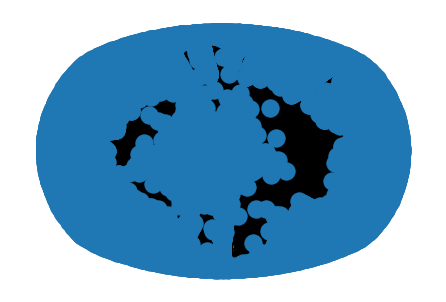

In [29]:
nx.draw(graph)

### Top Languages

In [6]:
toplang = graph

In [7]:
lang_nodes = []
for node in graph.nodes():
    if graph.nodes[node]['node_type']=='lang':
        lang_nodes.append(node)
print(lang_nodes)

['GDScript', 'GLSL', 'JavaScript', 'Python', 'HTML', 'C#', 'Vue', 'Vala', 'Java', 'Objective-C', 'CoffeeScript', 'Shell', 'Game Maker Language', 'Arduino', 'Batchfile', 'CSS', 'Go', 'C', 'PHP', 'Kotlin', 'TypeScript', 'C++', 'Ruby', 'Nginx', 'Dockerfile', 'Makefile', 'ActionScript', 'HCL', 'Lua', 'Matlab', 'Jupyter Notebook', 'GAP', 'HLSL', 'Jinja', 'Rust', 'Swift', 'Dart', 'Yacc', 'Pascal', 'TSQL', 'PowerShell', 'Processing', 'CMake', 'Assembly', 'R', 'PLpgSQL', 'NSIS', 'ASP.NET', 'XQuery', 'BlitzMax', 'Awk', 'Emacs Lisp', 'Perl', 'Common Lisp', 'Zig', 'Vim script', 'Scala', 'Crystal', 'Haxe', 'Tcl', 'Objective-C++', 'Eagle', 'TeX', 'reStructuredText', 'SCSS', 'Handlebars', 'Nix', 'DM', 'Elixir', 'Sass', 'Prolog', "Ren'Py", 'Scheme', 'PLSQL', 'ShaderLab', 'mcfunction', 'VBA', 'VimL', 'Nunjucks', 'Elm', 'RPC', 'Clojure', 'OCaml', 'F#', 'Nim', 'Less', 'VHDL', 'Markdown', 'AutoHotkey', 'Visual Basic', 'Haskell', 'D', 'MATLAB', 'XSLT', 'Groovy', 'Groff', 'Julia', 'Puppet', 'Perl6', 'Inno 

In [26]:
from collections import Counter
langs = Counter(dict(graph.in_degree(lang_nodes)))
print(langs)
print(len(langs))

Counter({'JavaScript': 4701, 'Python': 2975, 'Java': 1789, 'C++': 1471, 'HTML': 1417, 'C#': 1291, 'C': 1182, 'GDScript': 1132, 'PHP': 880, 'Go': 826, 'TypeScript': 806, 'Shell': 763, 'CSS': 726, 'Objective-C': 699, 'Swift': 484, 'Ruby': 466, 'Jupyter Notebook': 410, 'Dart': 385, 'Rust': 295, 'Lua': 220, 'R': 196, 'Kotlin': 192, 'Vue': 164, 'Makefile': 109, 'Dockerfile': 104, 'CoffeeScript': 98, 'Haxe': 96, 'SaltStack': 95, 'GLSL': 85, 'Assembly': 81, 'Vim script': 80, 'TeX': 78, 'Scala': 75, 'PowerShell': 68, 'Markdown': 67, 'SCSS': 65, 'ActionScript': 62, 'Haskell': 60, 'Elixir': 58, 'Perl': 55, 'Clojure': 48, 'Pascal': 44, 'Batchfile': 40, 'Emacs Lisp': 40, 'Objective-C++': 36, 'CMake': 34, 'ShaderLab': 34, 'Vala': 32, 'GAP': 31, 'VimL': 31, 'Processing': 29, 'Arduino': 26, 'Matlab': 22, 'Zig': 21, 'Elm': 21, 'Common Lisp': 20, 'Crystal': 20, 'OCaml': 20, 'Yacc': 19, 'Visual Basic': 18, 'Groovy': 18, 'Svelte': 18, 'Nix': 17, 'Scheme': 17, 'MATLAB': 17, 'TSQL': 16, 'F#': 16, 'Nim': 16

### Repositories and Languages

In [9]:
repo_nodes = [node for node in graph.nodes() if graph.nodes[node]['node_type']=='repo']

In [10]:
repo_lang_graph = toplang.subgraph(repo_nodes+lang_nodes)
repo_lang_count= Counter(dict(repo_lang_graph.in_degree(lang_nodes)))
print(repo_lang_count)

Counter({'JavaScript': 4347, 'Python': 2668, 'Java': 1601, 'C++': 1285, 'C#': 1142, 'HTML': 1121, 'C': 1037, 'GDScript': 961, 'PHP': 763, 'Go': 727, 'Objective-C': 660, 'TypeScript': 660, 'Shell': 631, 'CSS': 544, 'Swift': 443, 'Ruby': 393, 'Dart': 355, 'Jupyter Notebook': 339, 'Rust': 239, 'R': 185, 'Kotlin': 157, 'Lua': 157, 'Vue': 109, 'SaltStack': 94, 'Haxe': 82, 'Makefile': 74, 'Dockerfile': 69, 'CoffeeScript': 66, 'Markdown': 65, 'GLSL': 63, 'Vim script': 58, 'Scala': 57, 'TeX': 55, 'Assembly': 53, 'PowerShell': 52, 'Elixir': 48, 'Haskell': 48, 'ActionScript': 47, 'Perl': 43, 'SCSS': 35, 'Clojure': 35, 'Pascal': 34, 'Vala': 28, 'Emacs Lisp': 27, 'Objective-C++': 27, 'ShaderLab': 23, 'Batchfile': 22, 'CMake': 21, 'GAP': 18, 'VimL': 18, 'Processing': 17, 'Zig': 17, 'Crystal': 16, 'Arduino': 15, 'Nix': 15, 'Matlab': 14, 'Elm': 14, 'Yacc': 13, 'Common Lisp': 12, 'OCaml': 12, 'F#': 12, 'Visual Basic': 11, 'MATLAB': 11, 'Groovy': 10, 'Svelte': 10, 'Scheme': 9, 'Nim': 9, 'Game Maker Lan

In [27]:
print(repo_lang_count.most_common(166))
common_langs = repo_lang_count.most_common(1)
print(common_langs)

[('JavaScript', 4347), ('Python', 2668), ('Java', 1601), ('C++', 1285), ('C#', 1142), ('HTML', 1121), ('C', 1037), ('GDScript', 961), ('PHP', 763), ('Go', 727), ('Objective-C', 660), ('TypeScript', 660), ('Shell', 631), ('CSS', 544), ('Swift', 443), ('Ruby', 393), ('Dart', 355), ('Jupyter Notebook', 339), ('Rust', 239), ('R', 185), ('Kotlin', 157), ('Lua', 157), ('Vue', 109), ('SaltStack', 94), ('Haxe', 82), ('Makefile', 74), ('Dockerfile', 69), ('CoffeeScript', 66), ('Markdown', 65), ('GLSL', 63), ('Vim script', 58), ('Scala', 57), ('TeX', 55), ('Assembly', 53), ('PowerShell', 52), ('Elixir', 48), ('Haskell', 48), ('ActionScript', 47), ('Perl', 43), ('SCSS', 35), ('Clojure', 35), ('Pascal', 34), ('Vala', 28), ('Emacs Lisp', 27), ('Objective-C++', 27), ('ShaderLab', 23), ('Batchfile', 22), ('CMake', 21), ('GAP', 18), ('VimL', 18), ('Processing', 17), ('Zig', 17), ('Crystal', 16), ('Arduino', 15), ('Nix', 15), ('Matlab', 14), ('Elm', 14), ('Yacc', 13), ('Common Lisp', 12), ('OCaml', 12)

In [12]:
common_lang_nodes = list(dict(common_langs).keys())
common_lang_graph = repo_lang_graph.subgraph(repo_nodes + common_lang_nodes)
node_degrees = common_lang_graph.degree()
useful_nodes = [node[0] for node in node_degrees if node[1] != 0]
final_lang_graph = common_lang_graph.subgraph(useful_nodes)

In [13]:
import matplotlib.pyplot as plt

In [14]:
def graph_colors(graph):
    colormap = {'user': 'green', 'lang':'violet','repo':'blue'}
    colorlist = []
    for node in graph.nodes():
        nodetype = graph.nodes[node]['node_type']
        colorlist.append(colormap.get(nodetype,'red'))
    return colorlist

In [15]:
labels = {n:n for n in common_lang_nodes}
colors = graph_colors(final_lang_graph)
len(final_lang_graph)

4348

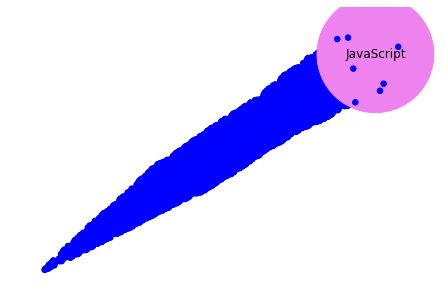

In [16]:
BASE = 30
node_sizes = []
for node in final_lang_graph.nodes():
    if node in labels:
        node_sizes.append(repo_lang_count[node]*2000/637)
    else:
        node_sizes.append(BASE)
nx.draw(final_lang_graph,node_color=colors,labels=labels,node_size=node_sizes)
plt.savefig('repo_lang_graph',dpi='figure',format='png')

### Users and Languages

In [17]:
user_nodes = [node for node in graph.nodes() if graph.nodes[node]['node_type']=='user']

In [18]:
user_lang_graph = toplang.subgraph(user_nodes + lang_nodes)
user_lang_count = Counter(dict(user_lang_graph.in_degree(lang_nodes)))
common_langs = user_lang_count.most_common(20)
print(common_langs)

[('JavaScript', 354), ('Python', 307), ('HTML', 296), ('Java', 188), ('C++', 186), ('CSS', 182), ('GDScript', 171), ('C#', 149), ('TypeScript', 146), ('C', 145), ('Shell', 132), ('PHP', 117), ('Go', 99), ('Ruby', 73), ('Jupyter Notebook', 71), ('Lua', 63), ('Rust', 56), ('Vue', 55), ('Swift', 41), ('Objective-C', 39)]


In [19]:
common_lang_nodes = list(dict(common_langs).keys())
common_lang_graph = user_lang_graph.subgraph(user_nodes + common_lang_nodes)
node_degrees = common_lang_graph.degree()
useful_nodes = [node[0] for node in node_degrees if node[1] != 0]

In [20]:

final_ulang_graph = common_lang_graph.subgraph(useful_nodes)

In [21]:
labels = {n:n for n in common_lang_nodes}
colors = graph_colors(final_ulang_graph)
len(final_ulang_graph)

579

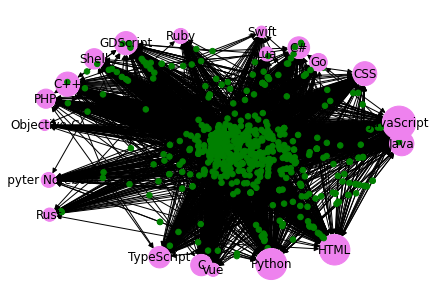

In [22]:
BASE = 30
node_sizes = []
for node in final_ulang_graph.nodes():
    if node in labels:
        node_sizes.append(user_lang_count[node]*2000/637)
    else:
        node_sizes.append(BASE)
nx.draw(final_ulang_graph,node_color=colors,labels=labels,node_size=node_sizes)
plt.savefig('user_lang_graph',dpi='figure',format='png')

### Questions:

In [24]:
print(common_langs)

[('JavaScript', 354), ('Python', 307), ('HTML', 296), ('Java', 188), ('C++', 186), ('CSS', 182), ('GDScript', 171), ('C#', 149), ('TypeScript', 146), ('C', 145), ('Shell', 132), ('PHP', 117), ('Go', 99), ('Ruby', 73), ('Jupyter Notebook', 71), ('Lua', 63), ('Rust', 56), ('Vue', 55), ('Swift', 41), ('Objective-C', 39)]
